In [1]:
# import the python modules that we will use
import psi4
%matplotlib inline
import matplotlib.pyplot as plt

## Setting up the molecule and getting the initial energy

The first code block will set up our molecule as an object in Psi4 using the function `psi4.geometry`. You will need to add in the final coordinates of your molecule from the nitrobenzene optimization from the last exercises. As before, we can use Psi4 to calculate different attributes of the molecule using the basis set that we specify. In this case we will use the Hartree-Fock method (SCF) and the cc-pVDZ basis set to calculate the energy of the molecule and store it in a value E for printing in the notebook when the calculation is complete. It is useful to check to make sure that this energy is the same as the one from the final geometry in the optimization - just to make sure that the geometry that you have put in is OK.

We can also print the positions of all the atoms at any time using `molecule.print_out_in_angstrom()` and all of the interatomic distances using `molecule.print_distances()`. We will print these to a file called 'geometry_initial' just as an example (we don't really need this information right now).

In [2]:
# set the amount of memory that you will need
psi4.set_memory('2 GB')

# set several threads to run to get the results a bit faster
psi4.set_num_threads(2)

# set the molecule name for your files and plots
molecule_name = "nitrobenzenepes"

# enter the starting coordinates of the atoms in your molecule
# note that the "0 1" is the charge and multiplicity of the molecule
molecule = psi4.geometry("""
symmetry c1
0 1
         C           -0.095064772343     0.146295623041     0.059537205186
         C            1.283018363291     0.142649668478     0.196784140588
         C            1.990331050963    -0.960422939516    -0.254006621934
         C            1.318416263743    -2.031528686933    -0.828747057589
         C           -0.064188925162    -2.007366882283    -0.956737400211
         C           -0.784558755686    -0.910752841459    -0.510319723340
         N           -0.848855091435     1.308105436534     0.533445635977
         O           -0.233820735922     2.201021978360     1.018562061794
         O           -2.029554627386     1.286506572614     0.404620639986
         H            1.779858487179     0.986578029758     0.646345969034
         H            3.066459468369    -0.982350238052    -0.155873129710
         H            1.875676025875    -2.889960105077    -1.178879784359
         H           -0.584173157007    -2.842448011438    -1.404447615844
         H           -1.857675444135    -0.866918749314    -0.597782154057
""")

# calculate the initial energy of the molecule using the Hartree-Fock method and the cc-pVDZ basis set to a file
psi4.set_output_file(molecule_name + '_energy_initial_v2.dat', False)
E = psi4.energy('scf/cc-pVDZ')

# print atomic coordinates and interatomic distances to a file
psi4.set_output_file(molecule_name + '_geometry_initial_v2.dat', False)
molecule.print_out_in_angstrom()
molecule.print_distances()

#print the energy out to the notebook
print('The energy is: ', E)

The energy is:  -434.21119653835046


## Determine the dihedral to be rotated 

You can use the same dihedrals as in the first approach.  Enter in the dihedrals as strings. Note that we are not going to give a list `phi` this time since we will use the range capability in a for loop.

In [3]:
# set the dihedral to be rotated around
dihedral1 = "2 1 7 8 "
dihedral2 = "6 1 7 9 "

## Approach 2: Calculating the PES by function call

In this second approach, we will run each of the optimizations as a function and get the energy back into a variable.  Then we will plot the energies as in the first approach for each of the dihedral angles involved. 

This next step is to use values returned by Psi4 functions to build get the energies. Also, we will use a for loop using a range - you get to figure out how to set up this range yourself!

The calculations will take a bit of time to do the optimization, so be patient!  To help speed up the process, we are going to again switch the basis set to the 3-21G basis (a smaller basis than the cc-pVDZ one we have used up to this point).  You will know all of the computations are complete when you see "All optimizations complete!".

In [4]:
psi4.set_output_file(molecule_name + '_torsionscan_v2.dat', False)

# create empty lists to store phi and energy values
phi = []
energy_values = []

# loop over all of the dihedral values
for P in range(0, 181, 10):
    # you could also loop over an array created using np.linspace() or similar; don't forget to import NumPy!
    #set up a string needed by Psi4 to freeze the dihedral
    frozen_dihedral1 = dihedral1 + " " + str(P) 
    frozen_dihedral2 = dihedral2 + " " + str(P)
    print('\nThe value of the frozen_dihedrals is: ', P)
    frozen_dihedral_total = frozen_dihedral1 + " " + frozen_dihedral2
    psi4.set_module_options('optking', {'fixed_dihedral': frozen_dihedral_total})  #set the fixed dihedral
    psi4.set_module_options('optking', {'g_convergence': 'gau_loose'})
    E = psi4.optimize('scf/3-21G', molecule=molecule)
    phi.append(P)
    energy_values.append(E)

print('All optimizations complete!')


The value of the frozen_dihedrals is:  0
Optimizer: Optimization complete!

The value of the frozen_dihedrals is:  10
Optimizer: Optimization complete!

The value of the frozen_dihedrals is:  20
Optimizer: Optimization complete!

The value of the frozen_dihedrals is:  30
Optimizer: Optimization complete!

The value of the frozen_dihedrals is:  40
Optimizer: Optimization complete!

The value of the frozen_dihedrals is:  50
Optimizer: Optimization complete!

The value of the frozen_dihedrals is:  60
Optimizer: Optimization complete!

The value of the frozen_dihedrals is:  70
Optimizer: Optimization complete!

The value of the frozen_dihedrals is:  80
Optimizer: Optimization complete!

The value of the frozen_dihedrals is:  90
Optimizer: Optimization complete!

The value of the frozen_dihedrals is:  100
Optimizer: Optimization complete!

The value of the frozen_dihedrals is:  110
Optimizer: Optimization complete!

The value of the frozen_dihedrals is:  120
Optimizer: Optimization complet

### Plotting how energy changes during the potential energy scan

Since we have all of the necessary information, we plot how the energy changes at each value of phi. What trend do you expect to see? Why?

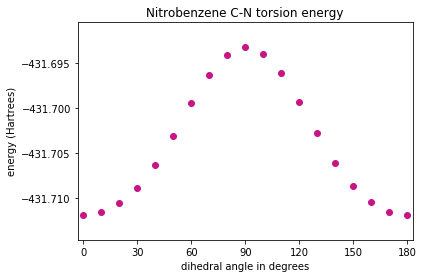

In [8]:
# determine an appropriate range for plotting
energy_range = max(energy_values) - min(energy_values)

# plot the energies at each iteration
plt.scatter(phi, energy_values, color='MediumVioletRed')
plt.xlim(min(phi)-3, max(phi)+3)
plt.xticks(range(0, 181, 30))
plt.ylim(top = max(energy_values) + energy_range*0.15, 
         bottom = min(energy_values) - energy_range*0.15)
plt.xlabel("dihedral angle in degrees")
plt.ylabel("energy (Hartrees)")
plt.title("Nitrobenzene C-N torsion energy")
plt.show()